In [80]:
import numpy as np
import os
from pathlib import Path
from keras.preprocessing import image

In [81]:
p=Path("./images/") 

In [82]:
directory=p.glob("*")

In [83]:
labels_dict={
    'cat':0,'dog':1,'horse':2,'human':3
}

In [84]:
labels=[]
image_data=[]
for folder_directory in directory: 
   # print(folder_directory)
    label=str(folder_directory).split("\\")[-1][:-1] 
    print(label)   
    for img_path in folder_directory.glob("*jpg"):
        print(img_path)
        img=image.load_img(img_path,target_size=(32,32))
        img_array=image.img_to_array(img)
        image_data.append(img_array)
        labels.append(labels_dict[label])

cat
images\cats\cat.1.jpg
images\cats\cat.10.jpg
images\cats\cat.100.jpg
images\cats\cat.101.jpg
images\cats\cat.102.jpg
images\cats\cat.103.jpg
images\cats\cat.104.jpg
images\cats\cat.105.jpg
images\cats\cat.106.jpg
images\cats\cat.107.jpg
images\cats\cat.108.jpg
images\cats\cat.109.jpg
images\cats\cat.11.jpg
images\cats\cat.110.jpg
images\cats\cat.111.jpg
images\cats\cat.112.jpg
images\cats\cat.113.jpg
images\cats\cat.114.jpg
images\cats\cat.115.jpg
images\cats\cat.116.jpg
images\cats\cat.117.jpg
images\cats\cat.118.jpg
images\cats\cat.119.jpg
images\cats\cat.12.jpg
images\cats\cat.120.jpg
images\cats\cat.121.jpg
images\cats\cat.122.jpg
images\cats\cat.123.jpg
images\cats\cat.124.jpg
images\cats\cat.125.jpg
images\cats\cat.126.jpg
images\cats\cat.127.jpg
images\cats\cat.128.jpg
images\cats\cat.129.jpg
images\cats\cat.13.jpg
images\cats\cat.130.jpg
images\cats\cat.131.jpg
images\cats\cat.132.jpg
images\cats\cat.133.jpg
images\cats\cat.134.jpg
images\cats\cat.135.jpg
images\cats\cat.13

images\horses\horse-179.jpg
images\horses\horse-18.jpg
images\horses\horse-180.jpg
images\horses\horse-181.jpg
images\horses\horse-182.jpg
images\horses\horse-183.jpg
images\horses\horse-184.jpg
images\horses\horse-185.jpg
images\horses\horse-186.jpg
images\horses\horse-187.jpg
images\horses\horse-188.jpg
images\horses\horse-189.jpg
images\horses\horse-19.jpg
images\horses\horse-190.jpg
images\horses\horse-191.jpg
images\horses\horse-192.jpg
images\horses\horse-193.jpg
images\horses\horse-194.jpg
images\horses\horse-195.jpg
images\horses\horse-196.jpg
images\horses\horse-197.jpg
images\horses\horse-198.jpg
images\horses\horse-199.jpg
images\horses\horse-2.jpg
images\horses\horse-20.jpg
images\horses\horse-200.jpg
images\horses\horse-201.jpg
images\horses\horse-202.jpg
images\horses\horse-21.jpg
images\horses\horse-22.jpg
images\horses\horse-23.jpg
images\horses\horse-24.jpg
images\horses\horse-25.jpg
images\horses\horse-26.jpg
images\horses\horse-27.jpg
images\horses\horse-28.jpg
image

In [85]:
print(len(image_data))
print(len(labels))

808
808


In [86]:
## Convert data into numpy array
image_data = np.array(image_data, dtype='float32')/255.0
labels = np.array(labels)
print(image_data.shape, labels.shape)

(808, 32, 32, 3) (808,)


In [87]:
## Randomly shuffle data
import random
combined=list(zip(image_data,labels))
random.shuffle(combined)
#Unzip
image_data[:],labels[:]=zip(*combined)

In [88]:
## Visualize the data
import matplotlib.pyplot as plt
def drawImg(img):
    plt.imshow(img)
    plt.axis("off")
    plt.show()
    return

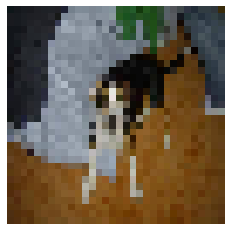

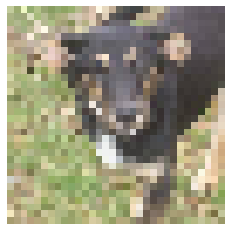

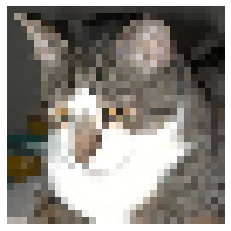

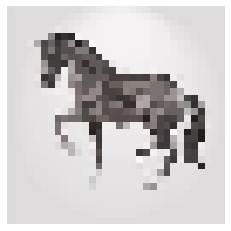

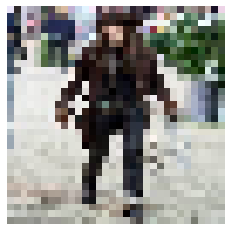

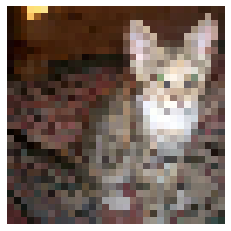

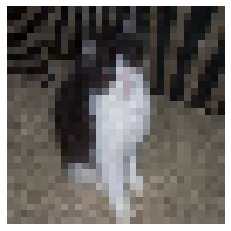

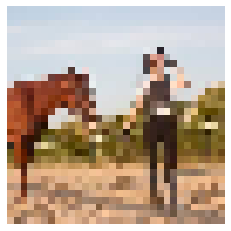

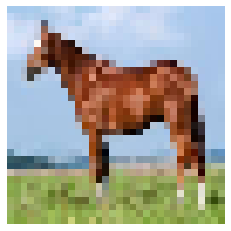

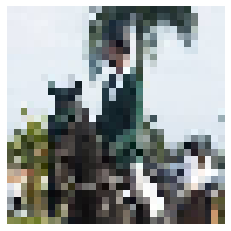

In [89]:
for i in range(10):
    drawImg(image_data[i])

### SVM CLASSIFIER

In [90]:
class SVM:
    def __init__(self,C=1.0):
        self.C=C
        self.W=0
        self.b=0
    def hingeLoss(self,W,b,X,Y):
        loss=0.0
        loss+=.5*np.dot(W,W.T)
        m=X.shape[0]
        for i in range(m):
            ti=Y[i]*(np.dot(W,X[i].T)+b)
            loss+=self.C*max(0,(1-ti))
        return loss[0][0]
    def fit(self,X,Y,batch_size=100,learning_rate=0.001,maxItr=300):
        no_of_features=X.shape[1]
        no_of_samples=X.shape[0]
        n=learning_rate
        c=self.C
        #Initialize the model parameters
        W=np.zeros((1,no_of_features))
        bias=0
        #Define array of Losses to visualise loss
        losses=[]
        for i in range(maxItr):
            #Training loop
            l=self.hingeLoss(W,bias,X,Y)
            losses.append(l)
            ids=np.arange(no_of_samples)
            np.random.shuffle(ids)
            #Batch Gradient Descent(Given in paper) with random shuffling
            for batch_start in range(0,no_of_samples,batch_size):
                gradw=0#Gradient w.r.t weight
                gradb=0#Gradient w.r.t bias
                #Iterate over all examples in the mini batch
                for j in range(batch_start,batch_start+batch_size):
                    if j <no_of_samples:
                        i=ids[j]
                        ti=Y[i]*(np.dot(W,X[i].T)+bias)
                        if ti>1:
                            gradw+=0
                            gradb+=0
                        else:
                            gradw+=c*X[i]*Y[i]
                            gradb+=c*Y[i]
                        #Gradient for the batch is ready!!Update weight and bias
                W=W-n*W+n*gradw
                bias=bias+n*gradb
        self.W=W
        self.b=bias
        return W,bias,losses           

### We need to convert data for One-for-One classifcation!¶

In [91]:
M = image_data.shape[0]
image_data=image_data.reshape(M,-1)
print(image_data.shape)

(808, 3072)


In [92]:
CLASSES=len(np.unique(labels))
print(CLASSES)

4


In [93]:
def classWiseData(x,y):
    data={}
    for i in range(CLASSES):
        data[i]=[]
    for i in range(x.shape[0]):
        data[y[i]].append(x[i])
    for k in data.keys():
        data[k]=np.array(data[k])
    return data

In [94]:
data= classWiseData(image_data,labels)  
print(data[0].shape)
print(data[1].shape[0])
print(data[2].shape[0])
print(data[3].shape[0])

(202, 3072)
202
202
202


In [95]:
"""Combines Data of two classes into a signle matrix"""
def getDataPairForSVM(d1,d2):
    l1,l2=d1.shape[0],d2.shape[0]
    samples=l1+l2
    features=d1.shape[1]
    data_pair=np.zeros((samples,features))
    data_labels=np.zeros((samples,))
    data_pair[:l1,:]=d1
    data_pair[l1:,:]=d2
    data_labels[:l1]=-1
    data_labels[l1:]=+1
    return data_pair,data_labels
    

### Training NC2 SVM's Part!

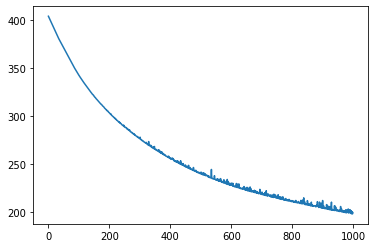

In [96]:
mySVM=SVM()
XP,YP=getDataPairForSVM(data[0],data[1])
weights,biases,loss=mySVM.fit(XP,YP,learning_rate=0.00001,maxItr=1000)
plt.plot(loss)

In [97]:
def trainSVMs(x,y):
    svm_classifiers={}
    for i in range(CLASSES):
        svm_classifiers[i]={}
        for j in range(i+1,CLASSES):
            xpair,ypair=getDataPairForSVM(data[i],data[j])
            weights,biases,loss=mySVM.fit(xpair,ypair,learning_rate=0.00001,maxItr=1000)
            svm_classifiers[i][j]=(weights,biases)
            plt.plot(loss)
            plt.show()
    return svm_classifiers

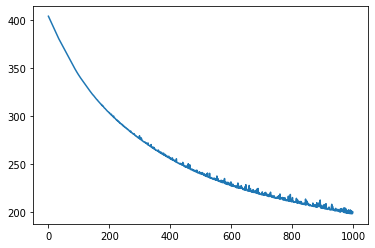

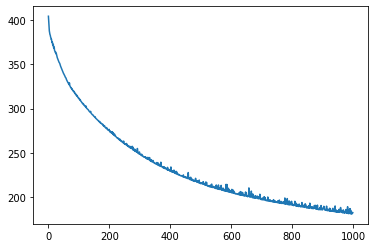

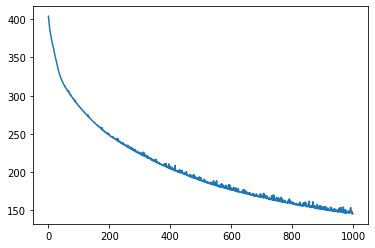

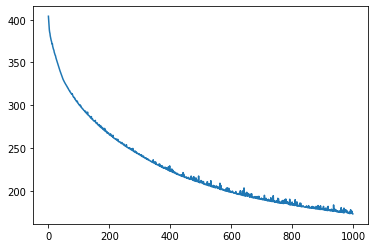

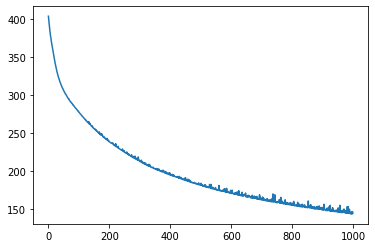

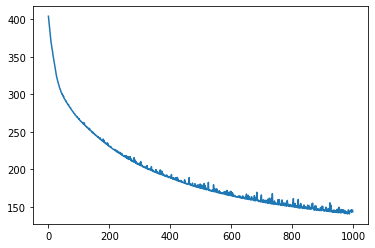

In [98]:
svm_classifiers=trainSVMs(image_data,labels)

In [99]:
svm_classifiers[0][1]

(array([[ 0.00676647,  0.01408802,  0.00932504, ..., -0.042907  ,
         -0.03250677, -0.03638634]]), -0.0371799999999999)

In [100]:
#Parameters for Cats and dogs
cats_dogs = svm_classifiers[0][1]
cats_humans = svm_classifiers[0][3]
print(cats_dogs[0].shape)#Weights
print(cats_dogs[1])

(1, 3072)
-0.0371799999999999


### PREDICTIONS

In [101]:
def Binary_Predict(x,weights,biases):
    z=np.dot(x,weights.T)+biases
    if(z>=0):
        return 1
    else:
        return -1
    

In [102]:
def predict(x):
    count=np.zeros(CLASSES,)
    for i in range(CLASSES):
        for j in range(i+1,CLASSES):
            weights,biases=svm_classifiers[i][j]
             #Take a majority prediction 
            z=Binary_Predict(x,weights,biases)
            if z==1:
                count[j]+=1
            else:
                count[i]+=1
    final_prediction=np.argmax(count)
    #print(count)
    return final_prediction

In [103]:
print(predict(image_data[0]))
print(labels[0])

0
1


In [104]:
def accuracy(x,y):
    pred=[]
    count=0
    for i in range(x.shape[0]):
        prediction=predict(x[i])
        pred.append(prediction)
        if(prediction==y[i]):
            count+=1
            
    return count/x.shape[0] ,pred   

In [105]:
acc, ypred = accuracy(image_data, labels)
print(acc)

0.6175742574257426


### SVM using SK-learn

In [106]:
from sklearn import svm

In [107]:
svm_classifier=svm.SVC(kernel='linear',C=1.0)

In [108]:
svm_classifier.fit(image_data,labels)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [109]:
ypred_sklearn = svm_classifier.predict(image_data)
svm_classifier.score(image_data,labels)

0.6695544554455446

### Confusion Matrix

In [110]:
from sklearn.metrics import confusion_matrix

In [111]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

### SVM classifier

In [112]:
cnf_matrix = confusion_matrix(labels, ypred)
print(cnf_matrix)

[[ 98  40  38  26]
 [ 23 127  26  26]
 [ 20  28 132  22]
 [ 17  20  23 142]]


Confusion matrix, without normalization
[[ 98  40  38  26]
 [ 23 127  26  26]
 [ 20  28 132  22]
 [ 17  20  23 142]]


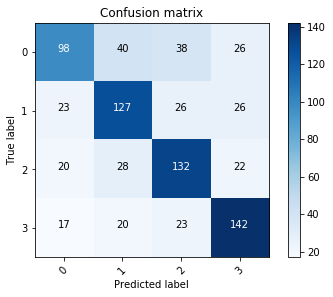

In [113]:
plot_confusion_matrix(cnf_matrix, [0,1,2,3],normalize=False,title='Confusion matrix',cmap=plt.cm.Blues)
plt.autoscale(enable=True, axis='y')


### Sci-kit Learn

In [114]:
cnf_matrix_sklearn = confusion_matrix(labels, ypred_sklearn)
print(cnf_matrix_sklearn)

[[118  30  29  25]
 [ 22 126  31  23]
 [ 20  17 141  24]
 [ 13  15  18 156]]


Confusion matrix, without normalization
[[118  30  29  25]
 [ 22 126  31  23]
 [ 20  17 141  24]
 [ 13  15  18 156]]


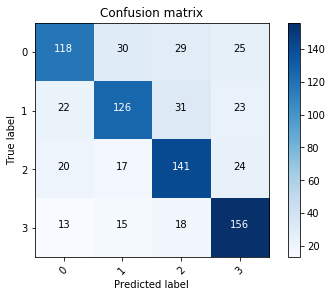

In [115]:
plot_confusion_matrix(cnf_matrix_sklearn, [0,1,2,3],normalize=False,title='Confusion matrix',cmap=plt.cm.Blues)
plt.autoscale(enable=True, axis='y')
